In [1]:
import sys
sys.path.append("/s/ls4/users/grartem/RL_robots/")
sys.path.append("/s/ls4/users/grartem/RL_robots/RL_robotSim/")

# sys.path.append("/home/sheins/rl-test/")
# sys.path.append("/home/sheins/rl-test/RL_robotSim")

#sys.path.append("/s/ls4/users/slava1195/rl_rob/")
#sys.path.append("/s/ls4/users/slava1195/rl_rob/RL_robotSim/")

from IPython.display import clear_output

In [18]:
import torch
print(torch.__version__)
import ray
ray.__version__

1.10.2+cu102


'1.9.2'

In [2]:
import gym
import numpy as np
import MyMisc
import pygame
import pyhocon
import matplotlib.pyplot as plt
%matplotlib inline


pygame 2.1.2 (SDL 2.0.16, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [4]:
env = MyMisc.continuous_env_maker(config={"name":"Test-Cont-Env-Auto-v0",
                                          'wrappers': [ 'ContinuousObserveModifier_sensorPrev'], # 'MyFrameStack'
                                          'max_prev_obs': 5,
                                          "frames_per_step":1,
                                          "base_env_config": {
                                              "add_obstacles":True,
                                              "max_distance" : 4,
                                              "add_bear":True, # add new bear
                                              "game_width":1500,
                                              "game_height":1000,
                                              "max_steps":20000,
                                              "framerate":5000,
                                              "obstacle_number":35,
                                              "constant_follower_speed":False,
                                              "corridor_length": 10,
                                              "corridor_width" : 1.5,
                                              "leader_speed_regime":{
                                                 0: [0.2, 1],
                                                 200: 1,
                                                 1000: [0.5, 1],
                                                 1500: 0.75,
                                                 2000: 0,
                                                 2500: 1,
                                                 3000: [0.5, 1],
                                                 4000: [0.0, 0.5],
                                                 5000: [0.4, 1],
                                              },
                                              "follower_speed_koeff": 0.6,
                                              "negative_speed": True,
                                              "bear_speed_coeff": 1.2,
                                              "move_bear_v4": True,
                                              "multiple_end_points":False,
                                              "warm_start":0,
                                              "add_bear": True,
                                              "bear_number": 2,
                                              "multi_random_bears": False,
                                              "bear_behind": False,
                                              "leader_speed_coeff": 0.45,
                                              #"early_stopping":{"max_distance_coef": 1.4, "low_reward": -300},
                                              "random_frames_per_step":[2, 20],
                                              "follower_sensors":{
                                                  'LeaderCorridor_Prev_lasers_v2_compas': {
                                                      'sensor_class': 'LeaderCorridor_Prev_lasers_v2',
                                                      'lasers_count': 12,
                                                      'laser_length': 150,
                                                      'react_to_green_zone': True,
                                                      'react_to_obstacles': True,
                                                      'react_to_safe_corridor': True,
                                                      'max_prev_obs': 5,
                                                      'use_prev_obs': True,
                                                      'sensor_name': 'LeaderCorridor_Prev_lasers_v2_compas',
                                                      'pad_sectors': True
                                                  },
                                                  'LaserPrevSensor_compas': {
                                                      'sensor_class': 'LeaderCorridor_Prev_lasers_v2',
                                                      'lasers_count': 24,
                                                      'laser_length': 200,
                                                      'react_to_green_zone': False,
                                                      'react_to_obstacles': True,
                                                      'react_to_safe_corridor': False,
                                                      'max_prev_obs': 5,
                                                      'use_prev_obs': True,
                                                      'pad_sectors': True
                                                  },
                                                  'LeaderPositionsTracker_v2': {
                                                      'sensor_class': 'LeaderPositionsTracker_v2',
                                                      'eat_close_points': False,
                                                      'generate_corridor': True,
                                                      'saving_period': 8,
                                                      'sensor_name': 'LeaderPositionsTracker_v2',
                                                      'start_corridor_behind_follower': True,
                                                      "corridor_length": 500,
                                                      "corridor_width" : 75,
                                                  }
                                         }
                                         }})




/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/src/continuous_grid_arctic/follow_the_leader_continuous_env.py:385: UserWarning: Одновременно заданы и random_frames_per_step и frames_per_step, будет использоваться random_frames_per_step
  warn(
/s/ls4/users/grartem/anaconda3/envs/rl_robots/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [4]:
env = MyMisc.continuous_env_maker(config={"name":"Test-Cont-Env-Auto-v0",
                                          'wrappers': ['ContinuousObserveModifier_sensorPrev'], # 'MyFrameStack'
                                          'max_prev_obs': 5,
                                          "base_env_config": {
                                              "game_width":1500,
                                              "game_height":1000,
                                              "pixels_to_meter": 10,
                                              "step_grid": 10,
                                              "max_steps":20000,
                                              "framerate":5000,
                                              "random_frames_per_step":[30, 70],
                                              "follower_size": (1, 1),
                                              "leader_size": (4, 2),
                                              "bear_size": (1.5, 1.5),
                                              #"frames_per_step":1,
                                              "min_distance" : 5,
                                              "max_distance" : 8,
                                              "constant_follower_speed":False,
                                              "leader_max_speed": 1,
                                              "follower_max_speed": 2,
                                              "negative_speed": True,
                                              "bear_max_speed": 1.2,
                                              "follower_max_rotation_speed": 28.65,
                                              "leader_max_rotation_speed": 28.65,
                                              "follower_acceleration": 0.5,
                                              "leader_acceleration": 2,
                                              "leader_speed_regime":{
                                                 0: [0.2, 1],
                                                 200: 1,
                                                 1000: [0.5, 1],
                                                 1500: 0.75,
                                                 2000: 0,
                                                 2500: 1,
                                                 3000: [0.5, 1],
                                                 4000: [0.0, 0.5],
                                                 5000: [0.4, 1],
                                              },
                                              "add_obstacles":True,
                                              "obstacle_number":20,
                                              "add_bear":True, # add new bear
                                              "bear_number": 2,
                                              "bear_behind": False,
                                              "multi_random_bears": False,
                                              "move_bear_v4": True,
                                              "bridge_size": (140, 50),
                                              "multiple_end_points":False,
                                              "warm_start":0,
                                              #"early_stopping":{"max_distance_coef": 1.4, "low_reward": -300},
                                              "follower_sensors":{
                                                  'LeaderCorridor_Prev_lasers_v2_compas': {
                                                      'sensor_class': 'LeaderCorridor_Prev_lasers_v2',
                                                      'lasers_count': 12,
                                                      'laser_length': 150,
                                                      'react_to_green_zone': True,
                                                      'react_to_obstacles': True,
                                                      'react_to_safe_corridor': True,
                                                      'max_prev_obs': 5,
                                                      'use_prev_obs': True,
                                                      'sensor_name': 'LeaderCorridor_Prev_lasers_v2_compas',
                                                      'pad_sectors': True
                                                  },
                                                  'LaserPrevSensor_compas': {
                                                      'sensor_class': 'LeaderCorridor_Prev_lasers_v2',
                                                      'lasers_count': 24,
                                                      'laser_length': 200,
                                                      'react_to_green_zone': False,
                                                      'react_to_obstacles': True,
                                                      'react_to_safe_corridor': False,
                                                      'max_prev_obs': 5,
                                                      'use_prev_obs': True,
                                                      'pad_sectors': True
                                                  },
                                                  'LeaderPositionsTracker_v2': {
                                                      'sensor_class': 'LeaderPositionsTracker_v2',
                                                      'eat_close_points': False,
                                                      'generate_corridor': True,
                                                      'saving_period': 8,
                                                      'sensor_name': 'LeaderPositionsTracker_v2',
                                                      'start_corridor_behind_follower': True,
                                                      "corridor_length": 500,
                                                      "corridor_width" : 75,
                                                  }
                                         }}})


/s/ls4/users/grartem/RL_robots/continuous_grid_arctic/src/continuous_grid_arctic/follow_the_leader_continuous_env.py:369: UserWarning: Одновременно заданы и random_frames_per_step и frames_per_step, будет использоваться random_frames_per_step
  warn(
/s/ls4/users/grartem/anaconda3/envs/rl_robots/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [33]:
l = [0, 1, 2, 3, 5, 6, 9, 11, 12, 14, 16, 17, 18, 19,20, 21, 23, 24, 29, 31, 33, 35, 36, 37, 38, 39, 42, 44, 48, 49, 51, 53, 54, 56, 58, 68, 74, 76,
    78, 80, 84, 91, 92, 93, 95, 96, 100, 101, 103, 106, 110, 113, 114, 115, 116, 117,118, 120, 122, 124, 126, 127, 130, 131, 133, 
     134, 135, 136, 139, 140, 143, 152, 153, 154, 155, 156, 157, 159, 160, 161, 165, 166, 168, 169, 170, 172, 173, 176, 178, 179,
    181, 182, 184, 188, 189, 191, 194, 195, 197, 199]
l = [0, 2, 3, 5, 6, 7, 9, 11, 12, 14, 16, 17, 18, 19,20, 21, 24, 25, 29, 31, 33, 35, 36, 37, 38, 39, 42, 44, 48, 50, 51, 53, 54, 56, 58, 68, 74, 76,
    78, 80, 84, 91, 92, 93, 95, 96, 98, 101, 103, 106, 112, 113, 114, 115, 116, 117,118, 120, 122, 124, 126, 127, 130, 131, 133, 
     134, 135, 139, 140, 142, 143, 152, 153, 154, 155, 156, 157, 159, 160, 161, 165, 166, 168, 169, 170, 172, 175, 176, 178, 179,
    181, 182, 183, 188, 189, 191, 193, 195, 197, 199]
len(l)

100

In [10]:
configs = pyhocon.ConfigFactory.parse_file("/s/ls4/users/grartem/RL_robots/RL_robotSim/Configs/FollowerContinuous/Environment_2.conf")
#CONFIG = configs["ppo_e28_b1_f14v2_prev5_m_trans_v4v2"].as_plain_ordered_dict()
CONFIG = configs["envconf_v30_f1v2"].as_plain_ordered_dict()
CONFIG["env_config"]["base_env_config"]["ignore_follower_collisions"] = True
CONFIG["env_config"]["base_env_config"]["early_stopping"] = {}
CONFIG["env_config"]["wrappers"] = ['ContinuousObserveModifier_sensorPrev']
env = MyMisc.continuous_env_maker(config=CONFIG["env_config"])

In [35]:
!mkdir /s/ls4/users/grartem/RL_robots/RL_robotSim/Notebooks/v30_final_1stTry

In [12]:
ret[0].shape

(10, 36)

In [11]:
for i in range(200):
    env.seed(i)
    env.reset()
    #for j in range(10000):
    for j in range(2):
        ret = env.step(action=[0,0.00])
        if ret[2]:
            break
        if env.env.env.leader_finished:
            break
    break
    #clear_output(wait=True)
    env.render()
    plt.figure(figsize=(10,10))
#     plt.imsave("/s/ls4/users/grartem/RL_robots/RL_robotSim/Notebooks/CorridorFixTest/{}.png".format(i),
#                pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))
#     plt.imsave("/home/sheins/rl-test/RL_robotSim/Notebooks/CorridorFixTest/{}.png".format(i),
#                pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))
    plt.imsave("/s/ls4/users/grartem/RL_robots/RL_robotSim/Notebooks/v30_final_1stTry/{}.png".format(i),
               pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))

===Запуск симуляции номер 0===


In [15]:
table = []
for i in range(200):
    env.seed(i)
    env.reset()
    for j in range(20):
        ret = env.step(action=[0,0.00])
        env.render()
        ret[3]["seed"] = i
        ret[3]["done"] = ret[2]
        table.append(ret[3])
        if ret[2]:
            break
        if env.env.env.leader_finished:
            break
    env.render()
    plt.figure(figsize=(10,10))
#     plt.imsave("/s/ls4/users/grartem/RL_robots/RL_robotSim/Notebooks/CorridorFixTest/{}.png".format(i),
#                pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))
#     plt.imsave("/home/sheins/rl-test/RL_robotSim/Notebooks/CorridorFixTest/{}.png".format(i),
#                pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))
    
    plt.imsave("/s/ls4/users/grartem/RL_robots/RL_robotSim/Notebooks/v29_2/{}.png".format(i),
               pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))

===Запуск симуляции номер 72===
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
АВАРИЯ! -10.0
===Запуск симуляции номер 73===
===Запуск симуляции номер 74===
===Запуск симуляции номер 75===
===Запуск симуляции номер 76===
===Запуск симуляции номер 77===
===Запуск симуляции номер 78===
===Запуск симуляции номер 79===
===Запуск симуляции номер 80===
===Запуск симуляции номер 81===
===Запуск симуляции номер 82===
===Запуск симуляции номер 83===
===Запуск симуляции номер 84===
===Запуск симуляции номер 85===
===Запуск симуляции номер 86===
===Запуск симуляции номер 87===
===Запуск симуляции номер 88===
===Запуск симуляции номер 89===
===Запуск симуляции номер 90===
===Запуск симуляции номер 91===
===Запуск симуляции номер 92===


<ipython-input-15-9d09315ffa35>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,10))


===Запуск симуляции номер 93===
===Запуск симуляции номер 94===
===Запуск симуляции номер 95===
===Запуск симуляции номер 96===
===Запуск симуляции номер 97===
===Запуск симуляции номер 98===
===Запуск симуляции номер 99===
===Запуск симуляции номер 100===
===Запуск симуляции номер 101===
===Запуск симуляции номер 102===
===Запуск симуляции номер 103===
===Запуск симуляции номер 104===
===Запуск симуляции номер 105===
===Запуск симуляции номер 106===
===Запуск симуляции номер 107===
===Запуск симуляции номер 108===
===Запуск симуляции номер 109===
===Запуск симуляции номер 110===
===Запуск симуляции номер 111===
===Запуск симуляции номер 112===
===Запуск симуляции номер 113===
===Запуск симуляции номер 114===
===Запуск симуляции номер 115===
===Запуск симуляции номер 116===
===Запуск симуляции номер 117===
===Запуск симуляции номер 118===
===Запуск симуляции номер 119===
===Запуск симуляции номер 120===
===Запуск симуляции номер 121===
===Запуск симуляции номер 122===
===Запуск симуляц

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [26]:
import pandas as pd
df = pd.DataFrame(table)
print(df.columns)
df[df["done"]]

Index(['mission_status', 'agent_status', 'leader_status', 'seed', 'done'], dtype='object')


,mission_status,agent_status,leader_status,seed,done
1,fail,crash,moving,0,True
2703,fail,crash,moving,136,True


In [34]:
env.seed(10)
env.reset()
for j in range(2):
    ret = env.step(action=[1,0.00])
    env.render()
    ret[3]["seed"] = i
    ret[3]["done"] = ret[2]
    print(ret[1], ret[2],ret[3])
    if ret[2]:
        break
    if env.env.env.leader_finished:
        break
env.render()
plt.figure(figsize=(10,10))
#     plt.imsave("/s/ls4/users/grartem/RL_robots/RL_robotSim/Notebooks/CorridorFixTest/{}.png".format(i),
#                pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))
#     plt.imsave("/home/sheins/rl-test/RL_robotSim/Notebooks/CorridorFixTest/{}.png".format(i),
#                pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))

plt.imsave("/s/ls4/users/grartem/RL_robots/RL_robotSim/Notebooks/v29_2/{}_2.png".format(10),
           pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))

===Запуск симуляции номер 279===
1.0 False {'mission_status': 'in_progress', 'agent_status': 'moving', 'leader_status': 'moving', 'seed': 199, 'done': False}
1.0 False {'mission_status': 'in_progress', 'agent_status': 'moving', 'leader_status': 'moving', 'seed': 199, 'done': False}


<Figure size 720x720 with 0 Axes>

In [6]:
len([7, 10, 12, 13, 16, 18, 20, 22, 25, 30, 33, 35, 36, 38, 40, 43, 44, 46, 47, 48, 49, 
50, 53, 55, 57, 59, 60, 65, 68, 73, 75, 76, 77, 78, 80, 82, 83, 86, 88, 89, 90, 93, 95, 96, 97, 98, 99, 
100, 101, 102, 105, 113, 116, 117, 118, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 132,134, 135,
138, 142, 144, 145, 146, 147, 149, 152, 153, 154, 155, 157, 160, 161, 162, 163, 166, 168,
170, 172, 174,175,176,177, 179, 180, 181, 183, 185, 188, 190, 192, 193, 194, 196, 197, 198, 199])

106

In [9]:
type(env.env.env.env)

src.continuous_grid_arctic.follow_the_leader_continuous_env.TestGameAuto

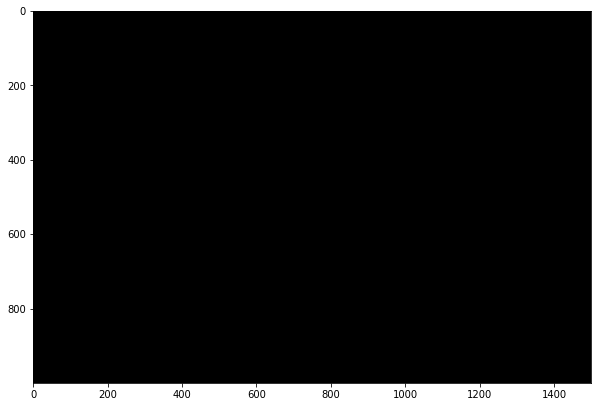

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))

In [13]:
# хорошие примеры для текущей версии (после добавления трёх точек и исправления регистрации столкновений с учетом расширения хитбокса при повороте)
# env v7
seeds_list = [1, 4, 5, 7 ,9, 10, 11, 14, 16, 17, 21, 24, 28, 29, 30, 32, 36, 38, 40, 43, 44, 45, 46, 49,
             53, 58, 59, 60, 62, 63, 64, 65, 66, 70, 72, 73, 76, 82, 84, 85, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100,
             103, 105, 107, 108, 109, 116,117, 119, 121,124, 127, 129, 131, 132, 138, 139, 140, 141, 146, 149, 150,
             152, 153, 154, 155, 156, 159, 160, 161, 166, 170, 172, 173, 174, 175, 176, 177, 179, 181, 182, 183, 185, 186,
             187, 189, 192, 194, 195, 196, 197, 198, 199]
# хорошие примеры для текущей версии (после добавления трёх точек и исправления регистрации столкновений с учетом расширения хитбокса при повороте)
# env v4
seeds_list = [7,12,13,14,16,17,18,20,27,30,32,35,47,48,49,50,
              52,58,64,65,73,74,75,76,77,78,80,81,82,85,86,88,90,93,94,95,96,97,98,99,
             101,103,104,105,109,112,113,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,132,135,138,141,143,144,145,147,149,150,
             152,153,154,155,157,159,160,161,162,163,166,168,170,172,175,176,179,182,183,188,192,194,195,196,197,198,199]
len(seeds_list)


100